# To use this notebook, have data of the following form in a CSV file
![data format example](Ben_CSV_example.jpg)


# Contents

#### 1. Prepare for analysis (import packages and set working directory)
#### 2. Read in, tidy, and explore the data
#### 3. Generate speed trace
#### 4. Generate OffFood/OnFood comparison bar plots (including BSR)
#### 5. Generate phenotype heatmap

# 1 - Prepare for analysis

## 1.1 - Import required packages

In [15]:
import os  # <- package used to work with system filepaths
import pandas as pd  # <- package used to import and organize data
import numpy as np  # <- package used to import and organize data
import math
import seaborn as sns  # <- package used to plot graphs
from matplotlib import pyplot as plt  # <- another package used to plot graphs
from itertools import cycle  # <- package used to iterate down rows
from ipywidgets import widgets  # <- widget tool to generate button
from IPython.display import display  # <- displays button
from tkinter import Tk, filedialog  # <- Tkinter is a GUI package
from tqdm.notebook import tqdm
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
from ipyfilechooser import FileChooser
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


## 1.2 - Set working directory to where the CSV file with experiment data is

In [2]:
# chooser = FileChooser(os.getcwd())
# display(chooser)

In [65]:
# csv_path=chooser.selected
# print(csv_path)
# os.chdir(chooser.selected_path)

In [3]:
os.chdir('C:\\Users\\movah\\Desktop\\Coding')

# 2 - Read in, tidy, and explore the data

## 2.1 - Read in the data, check its size and format

In [4]:
TotalConcatenated = pd.read_csv('BSR_baseline_output.csv') 
## Read file into the notebook

In [5]:
print(TotalConcatenated.shape)
print(TotalConcatenated)

(4761610, 21)
         Unnamed: 0.1  Unnamed: 0  time_bin  worm        time     speed  \
0                   0           0       3.0     1    2.666125  0.352013   
1                   1           1       3.0     8    2.546000  0.395982   
2                   2           2       3.0    85    2.744000  0.324933   
3                   3           3       3.0   165    2.776800  0.280820   
4                   4           4       3.0   249    2.817250  0.216575   
...               ...         ...       ...   ...         ...       ...   
4761605       4761605       34533     420.0   224  419.514417  0.144642   
4761606       4761606       34534     420.0   226  419.514417  0.065600   
4761607       4761607       34535     420.0   227  419.503545  0.131055   
4761608       4761608       34536     420.0   231  419.514417  0.161325   
4761609       4761609       34537     420.0   232  419.514417  0.123725   

                 x          y  angularspeed  pathlength       kink      bias  \
0    

## 2.2 - Get list of strains in the data set

In [204]:
TotalConcatenated_strains = TotalConcatenated
## Copy data into new variable

TotalConcatenated_strains[['Genotype', 'Treatment']] = TotalConcatenated_strains['Strain'].str.split('_', 1, expand = True)
## Extract Genotype and Treatment as new columns from Strain by using _ as a separator

TotalConcatenated_strains = TotalConcatenated_strains.dropna()
## Remove empty/invalid data

TotalConcatenated_strains = TotalConcatenated_strains.Genotype.unique()
## Change data to a list of all the unique Genotypes in the data

all_strains = pd.DataFrame(TotalConcatenated_strains, columns = ['Genotype'])
## Change list into a dataframe with one column of Genotypes

C:\Users\movah\AppData\Local\Temp\ipykernel_9660\540906942.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  TotalConcatenated_strains[['Genotype', 'Treatment']] = TotalConcatenated_strains['Strain'].str.split('_', 1, expand = True)


In [62]:
print(all_strains)
print(len(all_strains))

NameError: name 'all_strains' is not defined

## 2.3 - Determine the range for which you want to analyze data

In [8]:
start = 100  # <----- set the start time of the range
point = 400  # <----- set the end time of your range

TotalConcatenated_chunked = TotalConcatenated[(TotalConcatenated['time'] >= start) & (TotalConcatenated['time'] <= point)]
## Chunk the data to only include data within selected time range

## 2.4 - Find average measures for each worm (across duration of specified range), split 'Strain' column into two

Ex: 'N2_OnFood' becomes 'N2' & 'OnFood'

In [9]:
TotalConcatenated_mean = TotalConcatenated_chunked.groupby(["Strain", "worm"], as_index=False).mean()
## For each worm in each strain in the time we defined, give the mean value for every other parameter

TotalConcatenated_mean[['Genotype', 'Treatment']] = TotalConcatenated_mean['Strain'].str.split('_', expand = True)
## Extract Genotype and Treatment as new columns from Strain by using _ as a separator

TotalConcatenated_mean[['Gene','Allele']] = TotalConcatenated_mean['Genotype'].str.split('(',expand=True)
## Extract Gene and Allele as new columns from Genotype by using _ as a separator

TotalConcatenated_mean['Allele'] = TotalConcatenated_mean['Allele'].str[:-1]
## Remove the end bracket ) from the allele name


# SELECT ONLY NECESSARY COLUMNS

Worm_avg_speed = TotalConcatenated_mean[['Gene','Genotype', 'Treatment', 'Strain', 'speed']]
## Average speed of worms by gene, genotype, treatment, and strain

By_gene_avg_speed=TotalConcatenated_mean[['Gene','Treatment', 'speed']]
## Average speed of worms by gene and treatment

C:\Users\movah\AppData\Local\Temp\ipykernel_1800\2904814882.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TotalConcatenated_mean = TotalConcatenated_chunked.groupby(["Strain", "worm"], as_index=False).mean()


In [ ]:
print(Worm_avg_speed)
print(By_gene_avg_speed)

## 2.5 - Find average speed measures for each genotype and treatment (across duration of specified range)

In [10]:
TotalConcatenated_avg_speed = Worm_avg_speed.groupby(['Gene','Strain','Treatment', 'Genotype'], as_index = False).mean()
## For each treatment of each gene of each genotype of each strain, give mean speed

By_gene_avg_speed = By_gene_avg_speed.groupby(['Gene','Treatment'], as_index = False).mean()
## For each treatment of each gene, give the mean speed

In [ ]:
print(TotalConcatenated_avg_speed)
print(ByGene_avg_speed)

## 2.6 - Generate dataframe containing only data for N2 and CB1112 for use in speed trace

In [11]:
isinlist = TotalConcatenated_avg_speed[TotalConcatenated_avg_speed['Gene'].isin(['N2', 'cat-2'])].reset_index()
## Give average speed for N2 and CB1112 treatments, and reset index

print(isinlist)

   index   Gene                Strain Treatment      Genotype     speed
0      4     N2            N2_OffFood   OffFood            N2  0.193063
1      5     N2             N2_OnFood    OnFood            N2  0.098874
2     22  cat-2  cat-2(e1112)_OffFood   OffFood  cat-2(e1112)  0.209021
3     23  cat-2   cat-2(e1112)_OnFood    OnFood  cat-2(e1112)  0.190607


In [12]:
N2_cat2 = ['N2_OffFood', 'N2_OnFood', 'cat-2(e1112)_OffFood', 'cat-2(e1112)_OnFood']
TotalN2cat2 = TotalConcatenated[TotalConcatenated['Strain'].isin(N2_cat2)]
## Get all the raw data for N2 and CB1112 worms

print(TotalN2cat2.shape)
print(TotalN2cat2)

(1786511, 23)
         Unnamed: 0.1  Unnamed: 0  time_bin  worm        time     speed  \
0                   0           0       3.0     1    2.666125  0.352013   
1                   1           1       3.0     8    2.546000  0.395982   
2                   2           2       3.0    85    2.744000  0.324933   
3                   3           3       3.0   165    2.776800  0.280820   
4                   4           4       3.0   249    2.817250  0.216575   
...               ...         ...       ...   ...         ...       ...   
2429161       2429161      123218     420.0  1375  419.084000  0.181600   
2429162       2429162      123219     420.0  1379  419.473000  0.005378   
2429163       2429163      123220     420.0  1417  419.473000  0.049556   
2429164       2429164      123221     420.0  1418  419.473000  0.293289   
2429165       2429165      123222     420.0  1419  419.473000  0.192600   

                 x          y  angularspeed  pathlength       kink      bias  \
0    

# 3 - Generate speed trace

<Figure size 640x480 with 0 Axes>

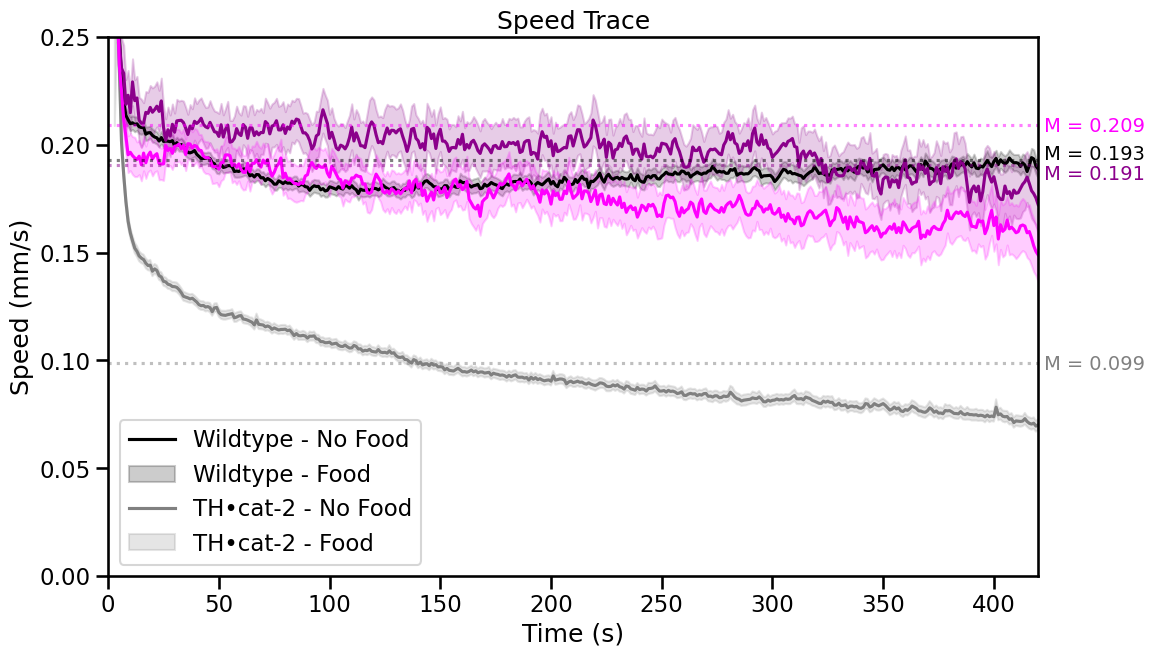

In [13]:
# Setting viewing range for your graph
top = 0.25
bottom = 0
left = 0
right = 420

# Set specifications for graph
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize = (12, 7))
plt.gca().xaxis.grid(False)

# Specify data and colours to be used
ax = sns.lineplot(x = "time_bin",
                  y = "speed",
                  # data = TotalConcatenated,  # <----- uncomment and comment row below if using all data
                  data = TotalN2cat2,
                  hue = 'Strain',
                  palette = ['black',
                             'grey',
                             '#8B008B',
                             '#FF00FF',
                            ],
                 legend=False)
# Specify location for legend
plt.legend(title='', loc = 'lower left',labels = ['Wildtype - No Food', 'Wildtype - Food', 'TH•cat-2 - No Food', 'TH•cat-2 - Food'])


# Specify labels
plt.xlabel("Time (s)")
plt.ylabel("Speed (mm/s)")
plt.title("Speed Trace")

# Specify viewing range using variables at top of cell
plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)

# # Add horizontal lines to visualize mean speed of each strain and condition (comment out if using more than N2 & CB1112)
# # If keeping uncommented, may need to adjust indexing to calculate proper speeds
plt.axhline(y = isinlist['speed'][0], color = 'black', linestyle = ':', alpha = 0.5)
plt.axhline(y = isinlist['speed'][1], color = 'grey', linestyle = ':', alpha = 0.5)
plt.axhline(y = isinlist['speed'][2], color = '#FF00FF', linestyle = ':', alpha = 0.5)
plt.axhline(y = isinlist['speed'][3], color = '#8B008B', linestyle = ':', alpha = 0.5)

# # Add annotations to show mean speed of each strain and condition
# # Same caution as previous step regarding proper speeds
ax.annotate(f" M = {round(isinlist['speed'][0], 3)}",
            xy = (420, isinlist['speed'][0]),
            xytext = (420, isinlist['speed'][0]),
            color = 'black', size = 14)
ax.annotate(f" M = {round(isinlist['speed'][1], 3)}",
            xy = (420, isinlist['speed'][1] - 0.003),
            xytext = (420, isinlist['speed'][1] - 0.003),
            color = 'grey', size = 14)
ax.annotate(f" M = {round(isinlist['speed'][2], 3)}",
            xy = (420, isinlist['speed'][2] - 0.003),
            xytext = (420, isinlist['speed'][2] - 0.003),
            color = '#FF00FF', size = 14)
ax.annotate(f" M = {round(isinlist['speed'][3], 3)}",
            xy = (420, isinlist['speed'][3] - 0.005),
            xytext = (420, isinlist['speed'][3] - 0.007),
            color = '#8B008B', size = 14)



# Save figure to current working directory
# plt.savefig(f'Speed_Trace_{left}to{right}s_legend.jpg', format = 'jpg', dpi = 450, bbox_inches='tight')

plt.show()

# 4 - Generate OffFood/OnFood comparison bar plots

## 4.1 - BSR bar plots (difference of differences and difference of percent change)

### 4.1.1 - First, take data only from the time in the experiment(s) you want to analyze, and find the average speed for each genotype and treatment

In [ ]:
start = 100 # define start timepoint
point = 400 # define end timepoint

# Take data between specified time points
chunkeddata = TotalConcatenated[(TotalConcatenated['time'] >= start) & (TotalConcatenated['time'] <= point)]


# Take mean of all measures for each worm
chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index = False).mean()

# Split `Strain` column into `Genotype` and `Treatment` columns
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)

# Select only the specified columns from previous result (others not important for BSR score)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]

# Take mean speed for each genotype and treatment (should result in 2 rows for each genotype - 1 for each condition)
avg_speed = worm_avg_speed.groupby(['Strain', 'Genotype', 'Treatment'], as_index = False).mean()

In [ ]:
print(len(avg_speed.Genotype.unique()))
print(len(avg_speed))

### 4.1.2 - Then, calculate the difference in speed between conditions for each genotype (in mm/s), as well as the percent change in speed relative to OffFood speed for each genotype

In [ ]:
names=pd.DataFrame()
## Create an empty dataframe to put strain names into

names['names']=avg_speed.Genotype.unique()

## Put every unique genotype into the dataframe

print(names)
print(len(names))

In [ ]:
### ABSOLUTE DIFFERENCE

speed_diff = avg_speed.drop(columns = ["Strain", "Treatment"])
## Remove Strain and Treatment columns

speed_diff = speed_diff.groupby(["Genotype"], as_index = False).diff(periods = -1).dropna()
## Group by Genotype, calculate the difference in speed between on food and off food

speed_diff.columns = ['speed_diff']
## Rename speed column to speed_diff


### PERCENT DIFFERENCE

speed_pct_diff = avg_speed.drop(columns = ["Strain", "Treatment"])
## Remove Strain and Treatment columns

speed_pct_diff = speed_pct_diff.groupby(["Genotype"], as_index = False).pct_change(periods = -1).dropna()
## Group by Genotype, calculate the percent difference in speed between on food and off food

speed_pct_diff.columns = ['speed_pct_diff']
## Rename speed column to speed_pct_diff



In [ ]:
speed_pct_diff = speed_pct_diff.reset_index(drop = True)
print(speed_pct_diff)
print(avg_speed)

### 4.1.3 - Combine the absolute difference and percent difference data

In [ ]:
speed_diff.insert(loc=0,column='Genotype', value=avg_speed['Genotype'].unique())
## Add unique genotypes as a new column to speed_diff

speed_diff=speed_diff.reset_index(drop=True)
## Reset index

In [ ]:
print(speed_diff)

In [ ]:
all_diff_measures = pd.concat([speed_diff, speed_pct_diff], axis = 1)
## Combine speed difference and percent speed difference dataframes into one

In [ ]:
print(all_diff_measures)

### 4.1.4 - Calculate BSR score using both methods (difference of differences & difference of percent change)

In [ ]:
# # find N2 speed differences
# print(all_diff_measures.iloc[0, 1])iloc[mem
# print(all_diff_measures.iloc[0, 2])

# calculate BSR score using difference of differences
all_diff_measures['Score_diff_of_diff'] = all_diff_measures['speed_diff'] - all_diff_measures.iloc[2,1]
## Make new difference of difference column

all_diff_measures['Score_diff_of_pct_diff'] = all_diff_measures['speed_pct_diff'] - all_diff_measures.iloc[2,2]
## Make new difference of pct difference column

In [ ]:
print(all_diff_measures)

### 4.1.5 - Make separate dataframe for each method of BSR calculation, and sort by ascending BSR score

In [ ]:
# DIFFERENCE OF DIFFERENCES
speed_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_diff"]).drop(columns = ['speed_pct_diff',
                                                                                               'Score_diff_of_pct_diff'])
## Remove speed_pct_diff and score_diff_of_pct_diff columns, sort diff of diff and speed_diff in ascending order

speed_diff_sorted = speed_diff_sorted.reset_index(drop = True)
print(speed_diff_sorted)

# DIFFERENCE OF PERCENT CHANGE
speed_pct_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_pct_diff"]).drop(columns = ['speed_diff',
                                                                                                       'Score_diff_of_diff'])
## Remove speed_diff and score_diff_of_diff columns, sort diff of pct diff and speed_pct_diff in ascending order

speed_pct_diff_sorted = speed_pct_diff_sorted.reset_index(drop = True)
print(speed_pct_diff_sorted)

## 4.1.6 - Making the bar plot (difference of differences)

In [ ]:
Title = "BSR Score - Difference of Differences"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_diff', 
             data = speed_diff_sorted,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel("BSR Score (Normalized to N2)")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.ylim(top = 0.07)
plt.ylim(bottom = -0.07)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

## 4.1.7 - Making the bar plot (difference of percent change)

In [ ]:
Title = "BSR Score - Difference of Percent Change"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_pct_diff', 
             data = speed_pct_diff_sorted,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 1.7)
plt.ylim(bottom = -1.7)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

## 4.2 - Generic differences of differences script (for any behavioural phenotype)

Very little commentary here, as code is similar to that for BSR score apart from inputting behavioural phenotype of interest

In [53]:
# behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']
parameter = 'curve'  # <----- INPUT PHENOTYPE OF INTEREST HERE

start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range

TotalConcatenated_chunked = TotalConcatenated[(TotalConcatenated['time'] >= start) & (TotalConcatenated['time'] <= point)]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()

parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index = False).diff(periods = -1).dropna()
parameter_diff.insert(loc = 0, column='Genotype', value = avg_parameter['Genotype'].unique())
parameter_diff.reset_index(drop = True)
parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[2,1]
parameter_diff = parameter_diff.sort_values(by = ["Score"])

kink_score=parameter_diff

#################

# print(parameter_diff.iloc[0,1])

#################

Title = f"{parameter.capitalize()} Score"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 7))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = "Genotype",
                 y = 'Score',
                 data = parameter_diff,  # <--------------- Input Here -------------
                 color = 'CornflowerBlue',
                 edgecolor = "DodgerBlue",
                 linewidth = 2.5,
                )

plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel(f"{parameter.capitalize()} Score (Normalized to N2)")

# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')

plt.show()

NameError: name 'chunkeddata' is not defined

# 5 - Phenotype Heatmap

## 5.1 - Calculate difference of differences scores for all behavioural phenotypes

In [205]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']

def differences_of_differences(start, point, df):
    chunkeddata0 = df[df["time"] >= start]
    chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
    chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index=False).mean()
    chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
    all_scores = all_strains
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
        avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
        parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
        parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
        parameter_diff.reset_index(drop=True)
        parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[2,1]
#         parameter_diff = parameter_diff.sort_values(by = ["Score"])
        parameter_diff = parameter_diff.drop(columns = [parameter])
        parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        parameter_diff = parameter_diff.reset_index(drop = True)
        all_scores = all_scores.join(parameter_diff.iloc[:,1])
    all_scores = all_scores.set_index("Genotype")
    return(all_scores)

differences_of_differences(300, 400, TotalConcatenated)

C:\Users\movah\AppData\Local\Temp\ipykernel_9660\4283995519.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index=False).mean()
C:\Users\movah\AppData\Local\Temp\ipykernel_9660\4283995519.py:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


,speed,angularspeed,bias,curve,crab,kink
Genotype,,,,,,
N2,-0.007739,0.193162,0.079408,3.197204,-0.000580,2.849711
C29E4.10(ok2752),-0.040882,2.181807,-0.148904,3.033286,-0.002221,12.075229
F53B2.5(ok226),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Y18D10A.22(ok3535),-0.030307,-4.382697,0.415849,0.190697,-0.005933,-4.350432
acr-12(ok367),0.028552,4.286592,0.193260,-0.421192,0.005001,-7.028911
acr-3(ok2049),-0.036642,1.651051,-0.147789,-1.953897,-0.000009,2.952159
acr-6(ok3117),-0.034028,-2.801141,0.314293,1.883260,-0.003896,2.360939
acr-8(ok1240),-0.053138,-3.449952,-0.018026,0.191421,-0.004806,-1.124673
bas-1(tm351),-0.070978,-3.358234,-0.153019,0.330519,-0.006386,1.501968


### 5.1.1 - Use function defined above to store difference of difference dataframe in a new variable

In [206]:
PD_gene_behavioural_scores = differences_of_differences(100, 400, TotalConcatenated)
PD_gene_behavioural_scores = PD_gene_behavioural_scores.dropna().sort_index()
print(PD_gene_behavioural_scores)

C:\Users\movah\AppData\Local\Temp\ipykernel_9660\4283995519.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index=False).mean()
C:\Users\movah\AppData\Local\Temp\ipykernel_9660\4283995519.py:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


                       speed  angularspeed      bias     curve      crab  \
Genotype                                                                   
C29E4.10(ok2752)   -0.034045      2.365377 -0.156345  1.650354 -0.002656   
F53B2.5(ok226)      0.000000      0.000000  0.000000  0.000000  0.000000   
N2                 -0.010712      0.465778  0.123292  3.518549 -0.000420   
Y18D10A.22(ok3535) -0.030755     -3.885597  0.362393 -0.011351 -0.004849   
acr-12(ok367)       0.023879      3.666346  0.079246 -0.397139  0.003851   
acr-3(ok2049)      -0.031060      1.350958 -0.154088 -1.662927 -0.000546   
acr-6(ok3117)      -0.058072     -4.051642  0.163541  0.660681 -0.005807   
acr-8(ok1240)      -0.053195     -2.897834 -0.014442  0.876403 -0.004482   
bas-1(tm351)       -0.066514     -4.690872 -0.019513  0.237527 -0.007215   
cat-1(e1111)       -0.052905     -4.181707  0.328870  1.590197 -0.007278   
cat-1(ok411)       -0.044110     -2.689756  0.248423 -1.542132 -0.005811   
cat-2(e1112)

### 5.1.2 - Standardize and normalize the difference of difference scores

In [207]:
PD_gene_behavioural_scores_standardize = (PD_gene_behavioural_scores - PD_gene_behavioural_scores.mean())/PD_gene_behavioural_scores.std()
# print(PD_gene_behavioural_scores_standardize)

PD_gene_behavioural_scores_normalize = PD_gene_behavioural_scores_standardize - PD_gene_behavioural_scores_standardize[PD_gene_behavioural_scores_standardize.index == 'N2'].squeeze()
# print(PD_gene_behavioural_scores_normalize)

PD_gene_behavioural_scores_normalize = PD_gene_behavioural_scores_normalize.drop(index = 'N2')
print(PD_gene_behavioural_scores_normalize)

                       speed  angularspeed      bias     curve      crab  \
Genotype                                                                   
C29E4.10(ok2752)   -0.687648      0.629402 -1.451165 -0.907286 -0.565298   
F53B2.5(ok226)      0.315710     -0.154328 -0.639818 -1.708778  0.106299   
Y18D10A.22(ok3535) -0.590692     -1.441759  1.240801 -1.714290 -1.120006   
acr-12(ok367)       1.019451      1.060457 -0.228575 -1.901648  1.080179   
acr-3(ok2049)      -0.599688      0.293290 -1.439451 -2.516375 -0.031728   
acr-6(ok3117)      -1.395770     -1.496775  0.208869 -1.387919 -1.362174   
acr-8(ok1240)      -1.252021     -1.114479 -0.714765 -1.283154 -1.027106   
bas-1(tm351)       -1.644561     -1.708574 -0.741081 -1.593423 -1.718310   
cat-1(e1111)       -1.243489     -1.539870  1.066839 -0.936501 -1.734258   
cat-1(ok411)       -0.984263     -1.045536  0.649360 -2.457712 -1.363302   
cat-2(e1112)       -1.917511     -0.923097 -1.222115 -1.737502 -1.339366   
cat-4(e1141)

## 5.2 - Calculate, standardize, and normalize t-scores for all baseline behavioural and morphological phenotypes

### 5.2.1 - Read in and tidy data (same data as used previously)

In [208]:
PD_baseline=TotalConcatenated_chunked.drop(columns=['x','y','Unnamed: 0'])
print(PD_baseline)

         Unnamed: 0.1  time_bin  worm        time     speed  angularspeed  \
182609         182609     101.0     2  100.497923  0.381008      8.592308   
182610         182610     101.0     5  100.497923  0.051185      1.953846   
182611         182611     101.0     7  100.497923  0.096000     16.707692   
182612         182612     101.0     8  100.497923  0.175292      7.253846   
182613         182613     101.0     9  100.497923  0.198285     26.269231   
...               ...       ...   ...         ...       ...           ...   
4760176       4760176     400.0   224  399.513917  0.130042      2.791667   
4760177       4760177     400.0   226  399.473818  0.036882      2.872727   
4760178       4760178     400.0   227  399.513917  0.069183      3.891667   
4760179       4760179     400.0   231  399.513917  0.132342      4.516667   
4760180       4760180     400.0   232  399.513917  0.135517     12.575000   

         pathlength        kink  bias      curve       dir      crab  \
182

In [209]:
PD_baseline_mean=PD_baseline.groupby(["Strain", "worm"], as_index=False).mean()
PD_baseline_mean[['Genotype', 'Treatment']] = PD_baseline_mean['Strain'].str.split('_', 1, expand=True)
print(PD_baseline_mean)

                         Strain  worm  Unnamed: 0.1  time_bin        time  \
0      C29E4.10(ok2752)_OffFood     1  1.571812e+06     250.5  250.000437   
1      C29E4.10(ok2752)_OffFood     2  1.570936e+06     225.5  224.999992   
2      C29E4.10(ok2752)_OffFood     6  1.569628e+06     189.0  188.497441   
3      C29E4.10(ok2752)_OffFood     7  1.571814e+06     250.5  250.002214   
4      C29E4.10(ok2752)_OffFood     8  1.571815e+06     250.5  250.000127   
...                         ...   ...           ...       ...         ...   
29851     vps-35(ok1880)_OnFood   229  4.747503e+06     249.0  248.502338   
29852     vps-35(ok1880)_OnFood   230  4.751496e+06     293.0  292.495707   
29853     vps-35(ok1880)_OnFood   231  4.755280e+06     338.0  337.503083   
29854     vps-35(ok1880)_OnFood   232  4.755281e+06     338.0  337.504033   
29855     vps-35(ok1880)_OnFood   233  4.754407e+06     326.5  325.999168   

          speed  angularspeed  pathlength       kink      bias      curve  

C:\Users\movah\AppData\Local\Temp\ipykernel_9660\3133160017.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  PD_baseline_mean[['Genotype', 'Treatment']] = PD_baseline_mean['Strain'].str.split('_', 1, expand=True)


In [210]:
# PD_baseline = PD_baseline.iloc[:, 1:]
PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', expand=True)
print(PD_baseline.head())

        Unnamed: 0.1  time_bin  worm        time     speed  angularspeed  \
182609        182609     101.0     2  100.497923  0.381008      8.592308   
182610        182610     101.0     5  100.497923  0.051185      1.953846   
182611        182611     101.0     7  100.497923  0.096000     16.707692   
182612        182612     101.0     8  100.497923  0.175292      7.253846   
182613        182613     101.0     9  100.497923  0.198285     26.269231   

        pathlength        kink  bias      curve       dir      crab    length  \
182609   12.354769   52.515385  -1.0  39.184615  0.001462  0.048508  0.836169   
182610    4.204308   31.784615   1.0  37.269231  0.000000  0.006346  0.627231   
182611    5.000000  104.161538   1.0  35.076923  0.000000  0.034923  0.438646   
182612   15.335846   60.638462   1.0  36.530769  0.000000  0.019015  0.867323   
182613   11.106538   47.669231   1.0  37.869231  0.000462  0.024369  0.809585   

         midline     width  morphwidth      area      St

### 5.2.2 - Subset the final 100 seconds of the experiment

In [211]:
PD_baseline_last100 = PD_baseline[((PD_baseline.time <= 400) & (PD_baseline.time >= 300))]
PD_baseline_last100 = PD_baseline_last100.reset_index()
PD_baseline_last100 = PD_baseline_last100.dropna().drop(columns=['index'])
print(PD_baseline_last100)

         Unnamed: 0.1  time_bin  worm        time     speed  angularspeed  \
0              547215     301.0     3  300.494000  0.112342     26.233333   
1              547216     301.0     5  300.526636  0.046927      3.281818   
2              547217     301.0    13  300.494000  0.201983      2.441667   
3              547218     301.0    14  300.494000  0.145258     10.058333   
4              547219     301.0    15  300.494000  0.032808     33.133333   
...               ...       ...   ...         ...       ...           ...   
1073539       4760176     400.0   224  399.513917  0.130042      2.791667   
1073540       4760177     400.0   226  399.473818  0.036882      2.872727   
1073541       4760178     400.0   227  399.513917  0.069183      3.891667   
1073542       4760179     400.0   231  399.513917  0.132342      4.516667   
1073543       4760180     400.0   232  399.513917  0.135517     12.575000   

         pathlength        kink      bias      curve       dir      crab  \

### 5.2.3 - Generate list of all strains in data set

In [212]:
list = PD_baseline_last100["Genotype"].unique()
print(list)

['N2' 'C29E4.10(ok2752)' 'F53B2.5(ok226)' 'Y18D10A.22(ok3535)'
 'acr-12(ok367)' 'acr-3(ok2049)' 'acr-6(ok3117)' 'acr-8(ok1240)'
 'bas-1(tm351)' 'cat-1(e1111)' 'cat-1(ok411)' 'cat-2(e1112)'
 'cat-4(e1141)' 'cat-4(tm773)' 'catp-6(ok3473)' 'chd-7(tm6183)'
 'crls-1(tm2542)' 'crls-1(tm2575)' 'djr-1.2(tm1346)' 'dnj-25(ok422)'
 'dop-1(vs101)' 'dop-3(ok295)' 'dop-3(tm1356)' 'gba-3(gk3287)'
 'gba-3(tm3302)' 'gck-3(tm1223)' 'gck-3(tm1296)' 'glo-1(tm15275)'
 'glo-1(tm3240)' 'glo-1(zu391)' 'hipr-1(tm14191)' 'let-19(gk149538)'
 'let-19(os33)' 'lrk-1(tm1898)' 'lrk-1(tm7568)' 'mbk-1(pk1389)'
 'mbl-1(tm1207)' 'mbl-1(tm1277)' 'mex-3(spr-10)' 'mex-3(spr5)'
 'mex-3(spr6)' 'mex-3(spr7)' 'mex-3(spr9)' 'mex-3(zu155)' 'pdr-1(gk448)'
 'pdr-1(tm598)' 'pink-1(ok3538)' 'pink-1(tm1779)' 'rskd-1(gk1208)'
 'set-2(n4589)' 'set-2(ok952)' 'sipa-1(ok879)' 'snb-5(ok1434)'
 'tag-138(gk247)' 'unc-10(ad591)' 'vps-35(hu68)' 'vps-35(ok1880)']


### 5.2.4 - Separate OffFood and OnFood data for comparison of behaviour within conditions

In [213]:
PD_baseline_last100_OffFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OffFood"].dropna().add_suffix('_OffFood')
PD_baseline_last100_OffFood = PD_baseline_last100_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype'})
print(PD_baseline_last100_OffFood)

PD_baseline_last100_OnFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OnFood"].dropna().add_suffix('_OnFood')
PD_baseline_last100_OnFood = PD_baseline_last100_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype'})
print(PD_baseline_last100_OnFood)

         Unnamed: 0.1_OffFood  time_bin_OffFood  worm_OffFood  time_OffFood  \
0                      547215             301.0             3    300.494000   
1                      547216             301.0             5    300.526636   
2                      547217             301.0            13    300.494000   
3                      547218             301.0            14    300.494000   
4                      547219             301.0            15    300.494000   
...                       ...               ...           ...           ...   
1065519               4725476             400.0           303    399.498667   
1065520               4725477             400.0           304    399.570900   
1065521               4725478             400.0           305    399.498667   
1065522               4725479             400.0           307    399.498667   
1065523               4725480             400.0           310    399.498667   

         speed_OffFood  angularspeed_OffFood  pathl

### 5.2.5 - Generate empty dataframes for each measure of phenotype (scores will be added to these)

In [193]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']

emptydfs_off = []
for parameter in behavioural_phenotypes:
    emptydfs_off.append(pd.DataFrame(columns = ["Genotype", parameter+'_OffFood']))
## Generate empty dataframes for off food
    
emptydfs_on = []
for parameter in behavioural_phenotypes:
    emptydfs_on.append(pd.DataFrame(columns = ["Genotype", parameter+'_OnFood']))
## Generate empty dataframes for on food

### 5.2.6 - Define t-test function

In [49]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest_ind(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type], equal_var = False)[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

### 5.2.7 - Use `TTest_Gene()` function to generate t-scores for each genotype, measure of phenotype, and condition, and combine them into one dataframe

In [194]:
PD_gene_baseline_Tstats = pd.DataFrame(PD_baseline_last100["Genotype"].unique(),
                                       columns = ["Genotype"]).set_index("Genotype")
## Create empty dataframe to contain t-test scores

for df in range(len(emptydfs_off)):
    TTest_Gene(PD_baseline_last100["Genotype"].unique(), emptydfs_off[df].columns[1],
              PD_baseline_last100_OffFood, emptydfs_off[df])
    PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(emptydfs_off[df].set_index('Genotype'), on = 'Genotype')
## Run t-tests for parameters off food and add them to dataframe
    
for df in range(len(emptydfs_on)):
    TTest_Gene(PD_baseline_last100["Genotype"].unique(), emptydfs_on[df].columns[1],
              PD_baseline_last100_OnFood, emptydfs_on[df])
    PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(emptydfs_on[df].set_index('Genotype'), on = 'Genotype')
## Run t-tests for parameters on food and add them to dataframe

              Genotype  speed_OffFood
0                   N2       0.000000
1     C29E4.10(ok2752)     -39.596125
2       F53B2.5(ok226)     -50.897369
3   Y18D10A.22(ok3535)     -73.593994
4        acr-12(ok367)      20.350617
5        acr-3(ok2049)      -7.246292
6        acr-6(ok3117)     -89.438005
7        acr-8(ok1240)     -54.375145
8         bas-1(tm351)     -17.844158
9         cat-1(e1111)    -156.389876
10        cat-1(ok411)     -35.901804
11        cat-2(e1112)      -0.083642
12        cat-4(e1141)     -26.753033
13        cat-4(tm773)     -36.915828
14      catp-6(ok3473)    -127.391213
15       chd-7(tm6183)     -43.609987
16      crls-1(tm2542)     -18.708337
17      crls-1(tm2575)     -32.459286
18     djr-1.2(tm1346)     -16.314944
19       dnj-25(ok422)       6.099015
20        dop-1(vs101)      -5.214501
21        dop-3(ok295)      -8.766146
22       dop-3(tm1356)     -31.847339
23       gba-3(gk3287)     -50.348937
24       gba-3(tm3302)     -17.628563
25       gck

              Genotype  crab_OffFood
0                   N2      0.000000
1     C29E4.10(ok2752)    -14.684602
2       F53B2.5(ok226)    -17.421847
3   Y18D10A.22(ok3535)    -66.017522
4        acr-12(ok367)     44.594259
5        acr-3(ok2049)     22.005781
6        acr-6(ok3117)    -88.220044
7        acr-8(ok1240)    -18.375727
8         bas-1(tm351)    -14.070498
9         cat-1(e1111)   -117.718913
10        cat-1(ok411)    -32.650330
11        cat-2(e1112)     25.652478
12        cat-4(e1141)     -5.364550
13        cat-4(tm773)    -20.006990
14      catp-6(ok3473)    -62.809313
15       chd-7(tm6183)    -93.640356
16      crls-1(tm2542)    -43.909263
17      crls-1(tm2575)    -62.806782
18     djr-1.2(tm1346)    -12.021469
19       dnj-25(ok422)     27.586110
20        dop-1(vs101)    -47.013701
21        dop-3(ok295)    -15.490358
22       dop-3(tm1356)    -20.678448
23       gba-3(gk3287)    -22.553376
24       gba-3(tm3302)    -35.028524
25       gck-3(tm1223)   -120.552231
2

              Genotype  bias_OnFood
0                   N2     0.000000
1     C29E4.10(ok2752)   -17.310061
2       F53B2.5(ok226)    -8.120512
3   Y18D10A.22(ok3535)   -37.803306
4        acr-12(ok367)   -39.778493
5        acr-3(ok2049)    21.416052
6        acr-6(ok3117)   -28.191194
7        acr-8(ok1240)     5.502644
8         bas-1(tm351)    16.369983
9         cat-1(e1111)  -167.676086
10        cat-1(ok411)   -48.015927
11        cat-2(e1112)    -6.629063
12        cat-4(e1141)   -27.019384
13        cat-4(tm773)    24.402791
14      catp-6(ok3473)   -47.888449
15       chd-7(tm6183)   -46.068766
16      crls-1(tm2542)    -8.772971
17      crls-1(tm2575)   -29.116048
18     djr-1.2(tm1346)   -43.179688
19       dnj-25(ok422)   -50.261048
20        dop-1(vs101)   -66.765539
21        dop-3(ok295)   -30.947271
22       dop-3(tm1356)    22.078915
23       gba-3(gk3287)   -20.364989
24       gba-3(tm3302)   -31.676282
25       gck-3(tm1223)   -31.633369
26       gck-3(tm1296)   -47

In [195]:
print(PD_gene_baseline_Tstats)

                    speed_OffFood  angularspeed_OffFood  bias_OffFood  \
Genotype                                                                
N2                       0.000000              0.000000      0.000000   
C29E4.10(ok2752)       -39.596125             -3.556830    -10.050036   
F53B2.5(ok226)         -50.897369              0.993466    -13.002905   
Y18D10A.22(ok3535)     -73.593994            -58.908084     22.271502   
acr-12(ok367)           20.350617             43.435596    -11.964313   
acr-3(ok2049)           -7.246292             23.138608     -3.400442   
acr-6(ok3117)          -89.438005            -53.517291     29.577208   
acr-8(ok1240)          -54.375145            -10.304750      0.086315   
bas-1(tm351)           -17.844158              4.025946     -4.137099   
cat-1(e1111)          -156.389876            -62.543035    -41.582241   
cat-1(ok411)           -35.901804             -2.703857      6.188244   
cat-2(e1112)            -0.083642             33.47

### 5.2.8 - Standardize and normalize t-scores

In [196]:
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index()

PD_gene_baseline_Tstats_standardize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
print(PD_gene_baseline_Tstats_standardize)

PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_standardize - PD_gene_baseline_Tstats_standardize[PD_gene_baseline_Tstats_standardize.index == 'N2'].squeeze()
print(PD_gene_baseline_Tstats_normalize)

PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_normalize.drop(index = 'N2')
print(PD_gene_baseline_Tstats_normalize)

                    speed_OffFood  angularspeed_OffFood  bias_OffFood  \
Genotype                                                                
C29E4.10(ok2752)         0.329272              0.453956     -0.060063   
F53B2.5(ok226)           0.184910              0.583566     -0.240603   
N2                       0.835072              0.555268      0.554400   
Y18D10A.22(ok3535)      -0.105017             -1.122663      1.916091   
acr-12(ok367)            1.095031              1.792483     -0.177103   
acr-3(ok2049)            0.742508              1.214346      0.346496   
acr-6(ok3117)           -0.307408             -0.969113      2.362765   
acr-8(ok1240)            0.140485              0.261749      0.559678   
bas-1(tm351)             0.607131              0.669943      0.301456   
cat-1(e1111)            -1.162650             -1.226201     -1.987957   
cat-1(ok411)             0.376463              0.478252      0.932753   
cat-2(e1112)             0.834004              1.50

## 5.3 - Generate phenotype heatmap with all measures

### 5.3.1 - Combine dataframe containing morphology and behaviour t-scores with dataframe containing difference of difference scores

In [214]:
full_heatmap = PD_gene_baseline_Tstats_normalize.join(PD_gene_behavioural_scores_normalize)
print(full_heatmap)

                    speed_OffFood  angularspeed_OffFood  bias_OffFood  \
Genotype                                                                
C29E4.10(ok2752)        -0.505800             -0.101312     -0.614464   
F53B2.5(ok226)          -0.650162              0.028298     -0.795004   
Y18D10A.22(ok3535)      -0.940089             -1.677931      1.361690   
acr-12(ok367)            0.259959              1.237215     -0.731504   
acr-3(ok2049)           -0.092564              0.659078     -0.207905   
acr-6(ok3117)           -1.142480             -1.524381      1.808365   
acr-8(ok1240)           -0.694587             -0.293519      0.005277   
bas-1(tm351)            -0.227941              0.114675     -0.252944   
cat-1(e1111)            -1.997722             -1.781469     -2.542358   
cat-1(ok411)            -0.458609             -0.077016      0.378352   
cat-2(e1112)            -0.001068              0.953617     -2.301661   
cat-4(e1141)            -0.341743              0.22

In [215]:
xlabels = ['Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)', 'Curve (Off Food)',
        'Crab (Off Food)', 'Kink (Off Food)', 'Speed (On Food)', 'Angular Speed (On Food)', 
         'Bias (On Food)', 'Curve (On Food)','Crab (On Food)', 'Kink (On Food)', 'Speed Difference', 
         'Angular Speed Difference', 'Bias Difference', 'Curve Difference','Crab (On Food)', 'Kink (On Food)']

### 5.3.2 - Produce and save heatmap

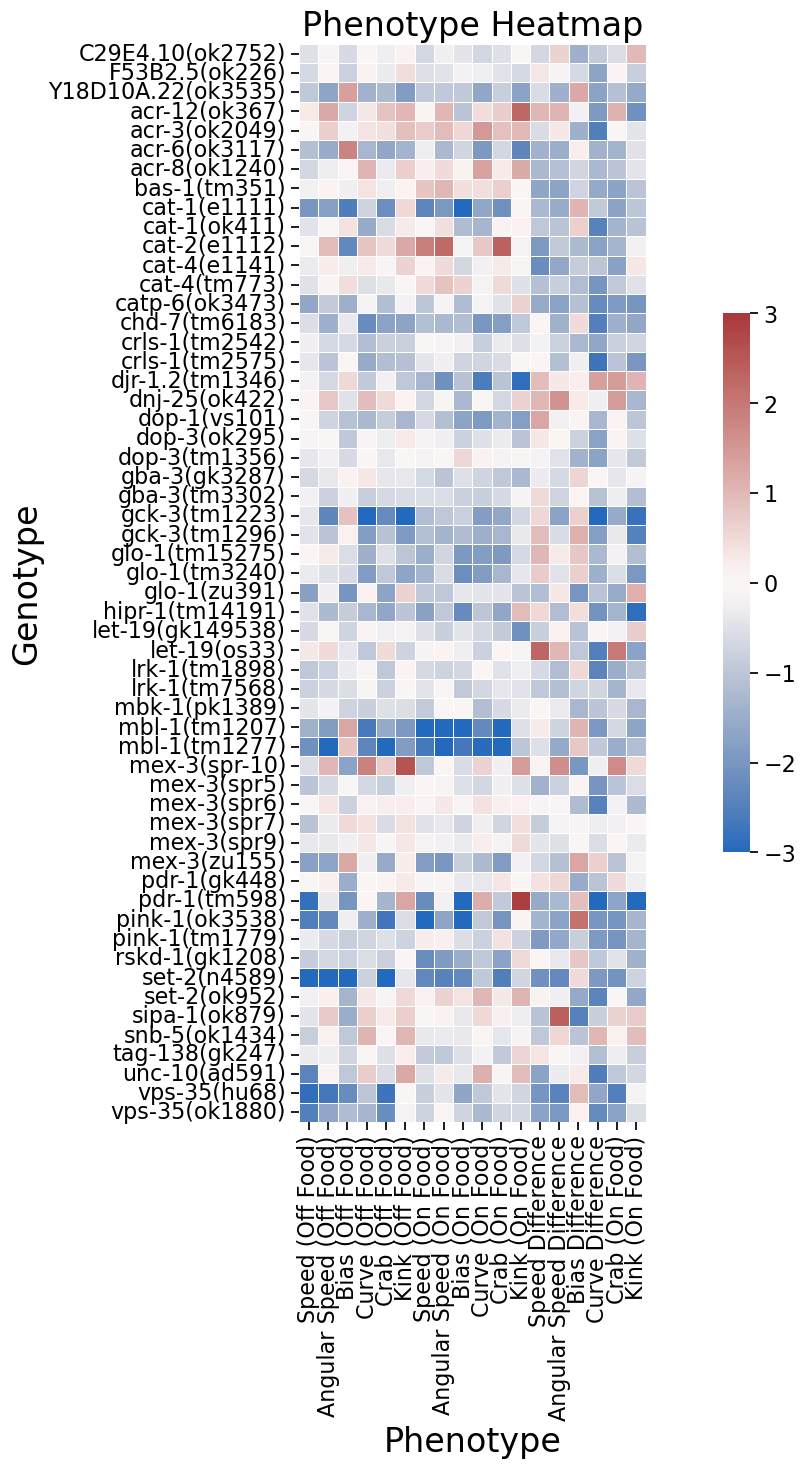

In [216]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = full_heatmap, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = xlabels,
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 24)
ax.set_xlabel('Phenotype', fontsize = 24)
ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('Complete_Genotype_heatmap_normalized_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

# 6 - N2 Batch Effects

## 6.1 - Set working directory to folder containing all experiment folders

In [16]:
chooser = FileChooser(os.getcwd())
display(chooser)

## Choose folder that contains all 'PDScreen_BSR_' folders

FileChooser(path='C:\Users\movah\Desktop\Coding\Moe', filename='', title='', show_hidden=False, select_desc='S…

In [17]:
csv_path=chooser.selected
print(csv_path)
os.chdir(chooser.selected_path)

C:\Users\movah\Desktop\Coding\Moe\


## 6.2 - Read in data for each experiment, add date column to each dataframe, and concatenate all experiments into one big dataframe

In [18]:
df_list = []
## Create empty list to contain all dated dataframes


### Loop that iterates each step over every experiment folder 

for exp_folder in os.listdir():
    os.chdir(os.getcwd() + '\\' + os.listdir()[os.listdir().index(exp_folder)])
    exp_data = pd.read_csv('baseline_output.csv')
    exp_data = exp_data[(exp_data['Strain'] == 'N2_Food') | (exp_data['Strain'] == 'N2_NoFood')]
## Change current directory to experiment folder, read in the data, and filter for N2 data only

    os.chdir(chooser.selected_path)
    n2_path = os.getcwd() + '\\' + os.listdir()[os.listdir().index(exp_folder)] + '\\N2_Food'
    exp_data['date'] = os.listdir(n2_path)[0][:8]
## From a sample N2 data folder, obtain date of experiment and add it as a new column to the experiment data

    df_list.append(exp_data)
## Add data to list containing dated experiment dataframes

In [19]:
TotalConcatenated_dated = pd.concat(df_list)
## Combine every dataframe in the dated experiment list into one concatenated dataframe

print(TotalConcatenated_dated)

        Unnamed: 0  time_bin  worm     time    speed       x      y  \
0                0       4.0     4    3.627  0.27220  18.940  30.80   
1                1       4.0     7    3.756  0.22220  30.030  22.80   
2                2       4.0    52    3.896  0.23390  13.805  34.12   
3                3       4.0    55    3.955  0.22890  15.164  35.72   
4                4       4.0    60    3.748  0.21900  29.450  28.62   
...            ...       ...   ...      ...      ...     ...    ...   
109569       54820     420.0   598  419.500  0.27830  37.800  36.70   
109570       54821     420.0   599  419.500  0.27050  22.400  52.10   
109571       54822     420.0   600  419.500  0.11560  24.250  52.44   
109572       54823     420.0   601  419.500  0.10315  23.550  18.05   
109573       54824     420.0   602  419.500  0.03278  36.720  33.62   

        angularspeed  pathlength   kink    bias  curve       dir      crab  \
0              3.434    -0.17460  45.28 -1.0000  33.28  0.000000  0.0

## 6.3.1 - Calculate difference scores by date

In [20]:
start = 100 # define start timepoint
point = 400 # define end timepoint

# Take data between specified time points
chunkeddata = TotalConcatenated_dated[(TotalConcatenated_dated['time'] >= start) & (TotalConcatenated_dated['time'] <= point)]

# Take mean of all measures for each worm
chunkeddata_mean = chunkeddata.groupby(["Strain", "worm", "date"], as_index = False).mean()

# Split `Strain` column into `Genotype` and `Treatment` columns
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)

# Select only the specified columns from previous result (others not important for BSR score)
worm_avg_speed = chunkeddata_mean[['Treatment', 'Strain', 'speed', 'date']]

# Take mean speed for each genotype and treatment (should result in 2 rows for each genotype - 1 for each condition)
avg_speed = worm_avg_speed.groupby(['date', 'Treatment'], as_index = False).mean()

C:\Users\movah\AppData\Local\Temp\ipykernel_18020\15959548.py:11: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
C:\Users\movah\AppData\Local\Temp\ipykernel_18020\15959548.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_speed = worm_avg_speed.groupby(['date', 'Treatment'], as_index = False).mean()


In [21]:
print(avg_speed)

        date Treatment     speed
0   20230323      Food  0.125535
1   20230323    NoFood  0.180332
2   20230518      Food  0.105350
3   20230518    NoFood  0.175462
4   20230608      Food  0.132835
5   20230608    NoFood  0.204330
6   20230628      Food  0.103553
7   20230628    NoFood  0.180854
8   20230705      Food  0.110377
9   20230705    NoFood  0.204336
10  20230712      Food  0.123602
11  20230712    NoFood  0.186490
12  20230803      Food  0.106011
13  20230803    NoFood  0.207293
14  20230927      Food  0.104902
15  20230927    NoFood  0.221125
16  20231012      Food  0.128399
17  20231012    NoFood  0.205287
18  20231026      Food  0.151170
19  20231026    NoFood  0.228605
20  20231109      Food  0.153867
21  20231109    NoFood  0.225754


In [22]:
speed_diff = avg_speed.drop(columns = ["Treatment"])
## Remove Treatment column

speed_diff = speed_diff.groupby(["date"], as_index = False).diff(periods = 1).dropna()
## Group by date, calculate the difference in speed between on food and off food

speed_diff.columns = ['speed_diff']
## Rename speed column to speed_diff

In [23]:
print(speed_diff)

    speed_diff
1     0.054798
3     0.070111
5     0.071495
7     0.077301
9     0.093960
11    0.062888
13    0.101282
15    0.116223
17    0.076887
19    0.077435
21    0.071887


In [24]:
date_vals = avg_speed[avg_speed.Treatment != 'Food'].drop(columns = ['Treatment', 'speed'])
## Create new dataframe to extract date values to tack onto speed differences

speed_diff_date = date_vals.join(speed_diff).reset_index(drop = True)
## Label speed difference values with their date

print(speed_diff_date)

        date  speed_diff
0   20230323    0.054798
1   20230518    0.070111
2   20230608    0.071495
3   20230628    0.077301
4   20230705    0.093960
5   20230712    0.062888
6   20230803    0.101282
7   20230927    0.116223
8   20231012    0.076887
9   20231026    0.077435
10  20231109    0.071887


## 6.3.2 - Calculate percent difference scores by date

In [25]:
speed_pct_diff = avg_speed.drop(columns = ["Treatment"])
## Remove Treatment column

speed_pct_diff = speed_pct_diff.groupby(["date"], as_index = False).pct_change(periods = 1).dropna()
## Group by date, calculate the percent difference in speed between on food and off food

speed_pct_diff.columns = ['speed_pct_diff']
## Rename speed column to speed_pct_diff

In [26]:
print(speed_pct_diff)

    speed_pct_diff
1         0.436514
3         0.665507
5         0.538223
7         0.746493
9         0.851263
11        0.508792
13        0.955390
15        1.107924
17        0.598816
19        0.512240
21        0.467201


In [27]:
date_vals = avg_speed[avg_speed.Treatment != 'Food'].drop(columns = ['Treatment', 'speed'])
## Create new dataframe to extract date values to tack onto speed differences

speed_pct_diff_date = date_vals.join(speed_pct_diff).reset_index(drop = True)
## Label speed difference values with their date

print(speed_pct_diff_date)

        date  speed_pct_diff
0   20230323        0.436514
1   20230518        0.665507
2   20230608        0.538223
3   20230628        0.746493
4   20230705        0.851263
5   20230712        0.508792
6   20230803        0.955390
7   20230927        1.107924
8   20231012        0.598816
9   20231026        0.512240
10  20231109        0.467201


## 6.4.1 - N2 difference scores by date bar plot

<Figure size 640x480 with 0 Axes>

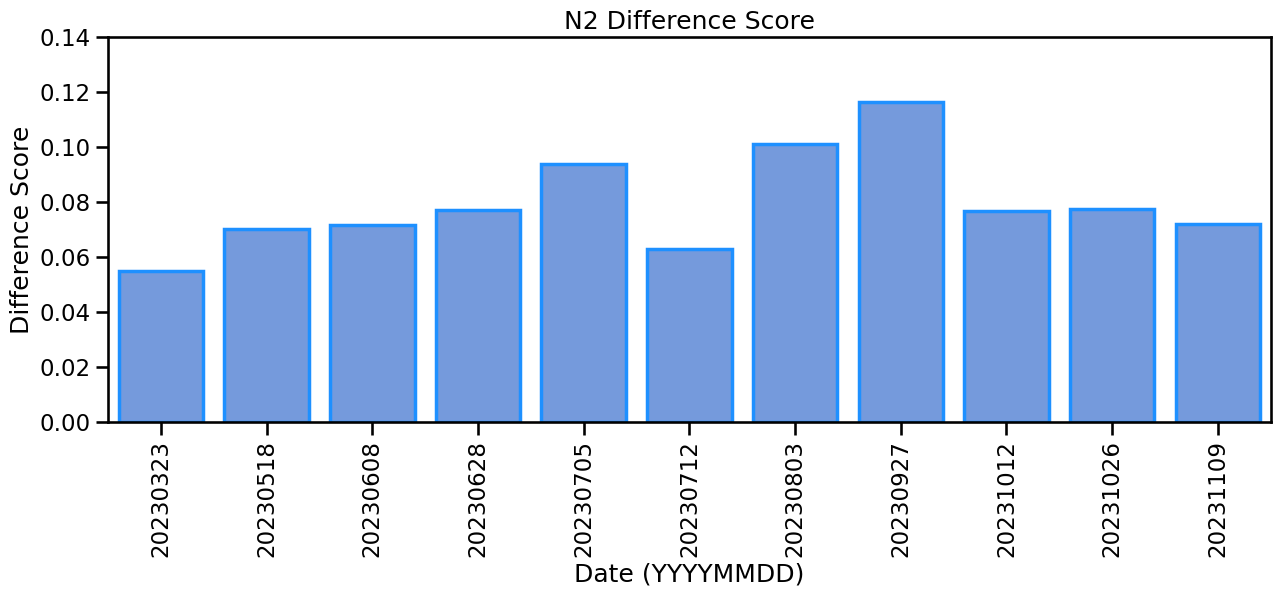

In [28]:
Title = "N2 Difference Scores"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'date', 
             y = 'speed_diff', 
             data = speed_diff_date,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Date (YYYYMMDD)")
plt.xticks(rotation = 90)
plt.ylabel("Difference Score")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.ylim(top = 0.14)
plt.ylim(bottom = 0)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

## 6.4.2 - N2 difference scores by date bar plot

<Figure size 640x480 with 0 Axes>

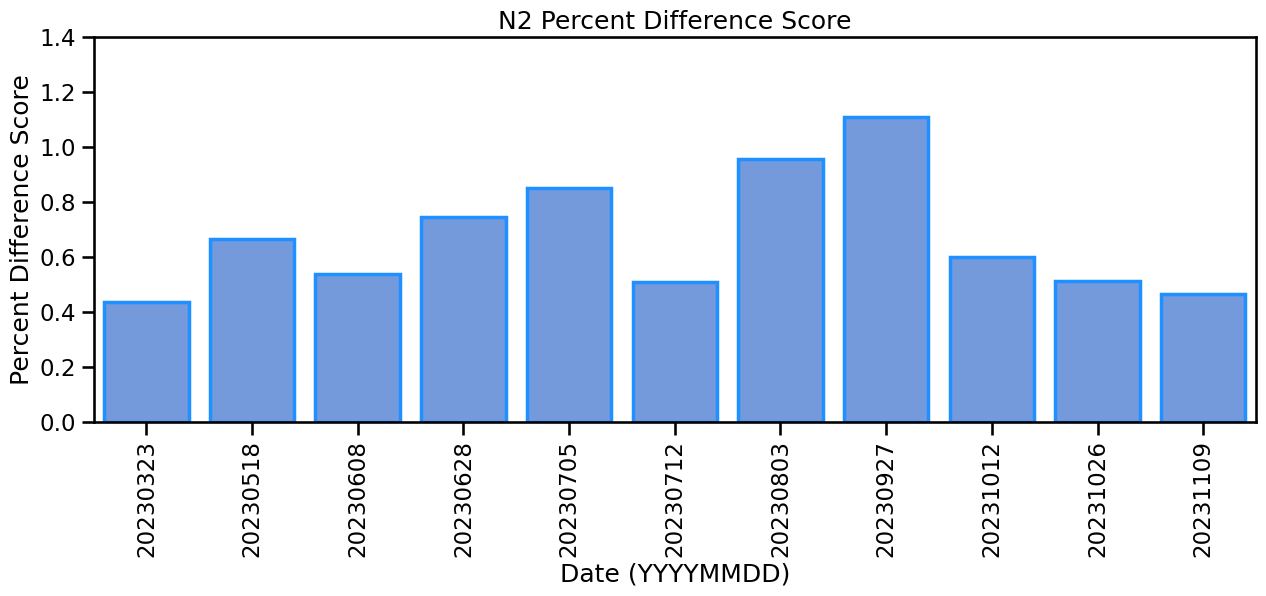

In [29]:
Title = "N2 Percent Difference Scores"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'date', 
             y = 'speed_pct_diff', 
             data = speed_pct_diff_date,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Date (YYYYMMDD)")
plt.xticks(rotation = 90)
plt.ylabel("Percent Difference Score")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.ylim(top = 1.4)
plt.ylim(bottom = 0)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()